In [21]:
# DS basic
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# SKLearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier

# pickle
import pickle
import json
import requests

In [22]:
iris = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [23]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

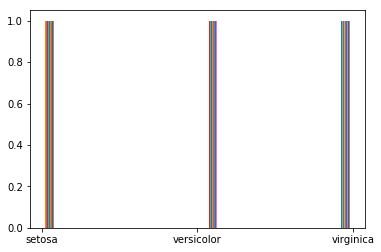

In [24]:
plt.hist(iris['species'])
plt.show()

In [25]:
# encode
le = LabelEncoder()
le.fit(iris['species'])

LabelEncoder()

In [26]:
iris['species'] = le.transform(iris['species'])
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [29]:
X = iris.iloc[:, 0:4]
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [31]:
y = iris.iloc[:, 4]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int32

In [32]:
# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 12)

In [33]:
# model
algo = DecisionTreeClassifier()
model = algo.fit(X_train, y_train)

In [34]:
# preds
pred = model.predict(X_test)

In [37]:
print(accuracy_score(y_test, pred))

0.9473684210526315


In [36]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.83      0.91        12
           2       0.85      1.00      0.92        11

   micro avg       0.95      0.95      0.95        38
   macro avg       0.95      0.94      0.94        38
weighted avg       0.96      0.95      0.95        38



In [38]:
# pickle
pickle.dump(model, open('iris_model.pkl', 'wb'))

In [39]:
my_model = pickle.load(open('iris_model.pkl', 'rb'))

In [40]:
url = 'http://localhost:9000/api'

In [41]:
data = json.dumps({'sepal_length': 6.3, 'sepal_width': 2.8, 'petal_length': 5.5, 'petal_width': 1.8})

In [42]:
send = requests.post(url, data)

ConnectionError: HTTPConnectionPool(host='localhost', port=9000): Max retries exceeded with url: /api (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000001C0B36EDF60>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it'))

In [ ]:
print(send.json())